In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
#read input data
data = pd.read_csv('city.csv')
data

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
0,"Респ Адыгея, г Адыгейск",385200.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Адыгейск,...,4,0,79403000000,79703000001,107,UTC+3,44.878414,39.190289,12689,1969
1,г Майкоп,385000.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Майкоп,...,4,2,79401000000,79701000001,105,UTC+3,44.609827,40.100661,144055,1857
2,г Горно-Алтайск,649000.0,Россия,Сибирский,Респ,Алтай,NaN,NaN,г,Горно-Алтайск,...,4,2,84401000000,84701000001,400,UTC+7,51.958103,85.960324,62861,1830
3,"Алтайский край, г Алейск",658125.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Алейск,...,4,0,1403000000,1703000001,2201,UTC+7,52.492251,82.779361,28528,1913
4,г Барнаул,656000.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Барнаул,...,4,2,1401000000,1701000001,2200,UTC+7,53.347997,83.779806,635585,1730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,"Ярославская обл, г Ростов",152150.0,Россия,Центральный,обл,Ярославская,р-н,Ростовский,г,Ростов,...,4,1,78410000000,78637101001,7609,UTC+3,57.205132,39.437862,31791,862
1113,"Ярославская обл, г Рыбинск",152900.0,Россия,Центральный,обл,Ярославская,р-н,Рыбинский,г,Рыбинск,...,4,1,78415000000,78715000001,7610,UTC+3,58.048550,38.858412,200771,1071
1114,"Ярославская обл, г Тутаев",152300.0,Россия,Центральный,обл,Ярославская,р-н,Тутаевский,г,Тутаев,...,4,1,78417000000,78643101001,7611,UTC+3,57.867499,39.536963,41001,1200
1115,"Ярославская обл, г Углич",152610.0,Россия,Центральный,обл,Ярославская,р-н,Угличский,г,Углич,...,4,1,78420000000,78646101001,7612,UTC+3,57.522425,38.302004,34505,1148


In [3]:
# sort cities by population in descending order
data = data.sort_values('population', ascending=False)
data

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
509,г Москва,101000.0,Россия,Центральный,г,Москва,NaN,NaN,NaN,NaN,...,1,0,45000000000,45000000,7700,UTC+3,55.754047,37.620405,11514330,1147
786,г Санкт-Петербург,190000.0,Россия,Северо-Западный,г,Санкт-Петербург,NaN,NaN,NaN,NaN,...,1,0,40000000000,40000000,7800,UTC+3,59.939131,30.315900,4848742,1703
647,г Новосибирск,630000.0,Россия,Сибирский,обл,Новосибирская,NaN,NaN,г,Новосибирск,...,4,2,50401000000,50701000001,5400,UTC+7,55.028191,82.921149,1498921,1893
832,г Екатеринбург,620000.0,Россия,Уральский,обл,Свердловская,NaN,NaN,г,Екатеринбург,...,4,2,65401000000,65701000001,6600,UTC+5,56.838522,60.605491,1377738,1723
619,г Нижний Новгород,603000.0,Россия,Приволжский,обл,Нижегородская,NaN,NaN,г,Нижний Новгород,...,4,2,22401000000,22701000001,5200,UTC+3,56.324063,44.005391,1250615,1221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,"Калининградская обл, Балтийский р-н, г Приморск",238510.0,Россия,Северо-Западный,обл,Калининградская,р-н,Балтийский,г,Приморск,...,4,0,27405555000,27705000006,3917,UTC+2,54.731144,19.998193,1956,1268
1086,"Респ Саха /Якутия/, у Верхоянский, г Верхоянск",678530.0,Россия,Дальневосточный,Респ,Саха /Якутия/,у,Верхоянский,г,Верхоянск,...,4,0,98216503000,98616103,1448,UTC+10,67.550245,133.390735,1311,1638
460,"Ленинградская обл, Выборгский р-н, г Высоцк",188909.0,Россия,Северо-Западный,обл,Ленинградская,р-н,Выборгский,г,Высоцк,...,4,0,41215504000,41615104001,4704,UTC+3,60.629624,28.570931,1244,1532
984,"Тульская обл, Суворовский р-н, г Чекалин",301414.0,Россия,Центральный,обл,Тульская,р-н,Суворовский,г,Чекалин,...,4,0,70240508000,70640108001,7100,UTC+3,54.098444,36.247414,994,1565


In [4]:
# choose 30 the most populated cities (in descending order)
data = data[:30]
data.head()

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
509,г Москва,101000.0,Россия,Центральный,г,Москва,NaN,NaN,NaN,NaN,...,1,0,45000000000,45000000,7700,UTC+3,55.754047,37.620405,11514330,1147
786,г Санкт-Петербург,190000.0,Россия,Северо-Западный,г,Санкт-Петербург,NaN,NaN,NaN,NaN,...,1,0,40000000000,40000000,7800,UTC+3,59.939131,30.315900,4848742,1703
647,г Новосибирск,630000.0,Россия,Сибирский,обл,Новосибирская,NaN,NaN,г,Новосибирск,...,4,2,50401000000,50701000001,5400,UTC+7,55.028191,82.921149,1498921,1893
832,г Екатеринбург,620000.0,Россия,Уральский,обл,Свердловская,NaN,NaN,г,Екатеринбург,...,4,2,65401000000,65701000001,6600,UTC+5,56.838522,60.605491,1377738,1723
619,г Нижний Новгород,603000.0,Россия,Приволжский,обл,Нижегородская,NaN,NaN,г,Нижний Новгород,...,4,2,22401000000,22701000001,5200,UTC+3,56.324063,44.005391,1250615,1221


In [5]:
# choose only necessary for the task columns
data = data[['address', 'geo_lat', 'geo_lon']]
data.head(30)

,address,geo_lat,geo_lon
509,г Москва,55.754047,37.620405
786,г Санкт-Петербург,59.939131,30.315900
647,г Новосибирск,55.028191,82.921149
832,г Екатеринбург,56.838522,60.605491
619,г Нижний Новгород,56.324063,44.005391
927,г Казань,55.794358,49.111497
782,г Самара,53.195031,50.106952
656,г Омск,54.984857,73.367452
1064,г Челябинск,55.160262,61.400808
757,г Ростов-на-Дону,47.222457,39.718803


In [6]:
# function to translate degrees to radians
def degrees_to_radian(degrees):
    return degrees * np.pi / 180
# function to calculate distance between two cities
def calculate_distance(city_info1, city_info2):
    # 1st city
    city_geo_lat1 = city_info1.loc['geo_lat']
    city_geo_lon1 = city_info1.loc['geo_lon']
    # 2nd city
    city_geo_lat2 = city_info2.loc['geo_lat']
    city_geo_lon2 = city_info2.loc['geo_lon']
    #Reference: https://stackoverflow.com/questions/365826/calculate-distance-between-2-gps-coordinates
    
    earth_radius_km = 6371
    
    dlat = degrees_to_radian(city_geo_lat2 - city_geo_lat1)
    dlon = degrees_to_radian(city_geo_lon2 - city_geo_lon1)
    
    lat1 = degrees_to_radian(city_geo_lat1)
    lat2 = degrees_to_radian(city_geo_lat2)
    
    a = np.sin(dlat/2)**2 + np.sin(dlon/2)**2 * np.cos(lat1) * np.cos(lat2)
    c = 2 * math.atan2(a ** 0.5, (1 - a) ** 0.5) 
    
    return earth_radius_km * c

In [7]:
# function to calculate distance of whole path
def calculate_full_distance(proposed_path):
    cur_path = proposed_path[:]
    total_distance = 0
    for i in range(len(cur_path) - 1):
        city1 = data.iloc[cur_path[i],:]
        city2 = data.iloc[cur_path[i + 1],:]
        total_distance += calculate_distance(city1, city2)
    # add distance between last and first
    total_distance += calculate_distance(data.iloc[cur_path[29],:], data.iloc[cur_path[0],:])
    return total_distance

In [8]:
# function to generate a new path
def suggested_path(cur_path):
    copy_cur_path = cur_path[:]
    index_to_swap1, index_to_swap2 = np.random.choice(copy_cur_path, 2, replace=False)
    tmp = copy_cur_path[index_to_swap1]
    copy_cur_path[index_to_swap1] = copy_cur_path[index_to_swap2]
    copy_cur_path[index_to_swap2] = tmp
    return copy_cur_path

In [9]:
# function to calculate log_probability (we take log, therefore we don't need to work with exponent)
def calculate_log_probability(cur_path, T):
    energy = calculate_full_distance(cur_path)
    return -energy/T

In [12]:
def simulated_annealing(annealing_rate):
    # create initial path
    iterations_count = 0
    initial_path = list(range(data.shape[0]))
    path = initial_path
    # set initial "temperature"
    initial_T = calculate_full_distance(path)
    len_of_paths = []
    all_iterations = 0
    accepted_iterations = 0 
    accepted_states = []
    while initial_T > 20:
        # Generate x′ from g(x′|xt);
        iterations_count += 1
        all_iterations += 1
        new_path = suggested_path(path)
        # Calculate acceptance ratio using log probabilities
        log_probability_before_swap = calculate_log_probability(path, initial_T)
        log_probability_after_swap = calculate_log_probability(new_path, initial_T)
        acceptance_ratio = log_probability_after_swap - log_probability_before_swap
        # if u <= acceptance_ratio, accept new state
        if np.random.uniform() <= np.e ** acceptance_ratio:
            path = new_path
            accepted_iterations += 1
        # update temperature not every iteration but every 15 iteration
        if iterations_count > 15:
            initial_T *= annealing_rate
            iterations_count = 0
        len_of_paths.append(calculate_full_distance(path))
        accepted_states.append(accepted_iterations / all_iterations)
    return len_of_paths, path, accepted_states

In [13]:
# simulated annealing with annealing rate = 0.1
pathes_rate_01, path, acceptance_01 = simulated_annealing(0.1)
print(calculate_full_distance(path))


39794.71358132553


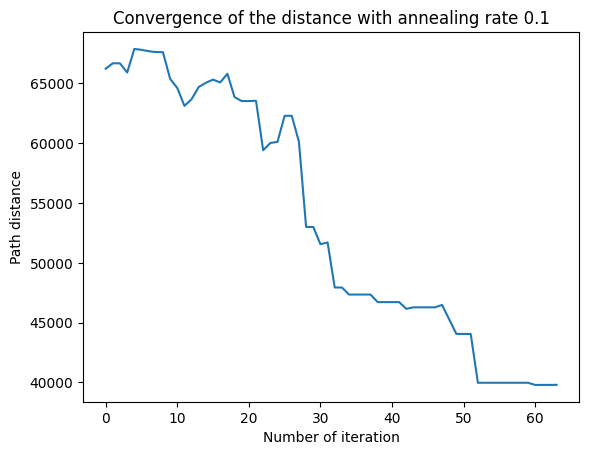

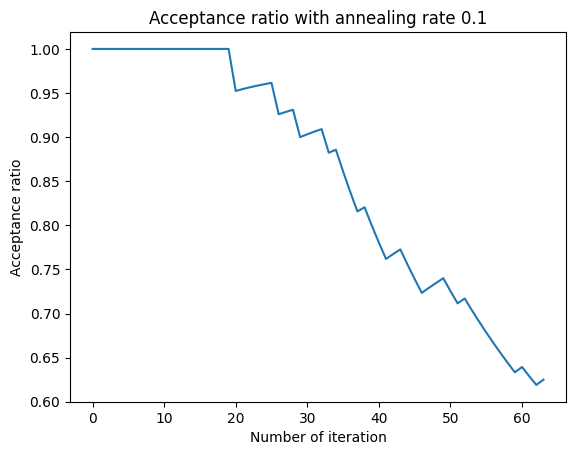

In [14]:
# plot path distance and number of iterations for annealing rate = 0.1
plt.plot(pathes_rate_01)
plt.xlabel('Number of iteration')
plt.ylabel('Path distance')
plt.title('Convergence of the distance with annealing rate 0.1')
plt.show()
# plot acceptance ratio for annealing rate = 0.1
plt.plot(acceptance_01)
plt.xlabel('Number of iteration')
plt.ylabel('Acceptance ratio')
plt.title('Acceptance ratio with annealing rate 0.1')
plt.show()

In [15]:
# simulated annealing with annealing rate = 0.5
pathes_rate_05, path, acceptance_05 = simulated_annealing(0.5)
print(calculate_full_distance(path))


34641.808175796374


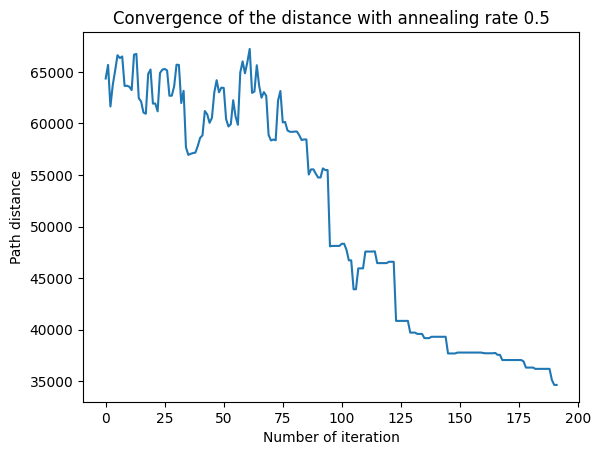

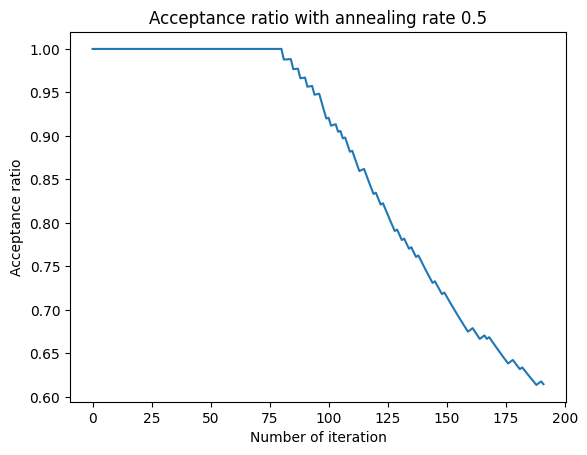

In [16]:
# plot path distance and number of iterations for annealing rate = 0.5
plt.plot(pathes_rate_05)
plt.xlabel('Number of iteration')
plt.ylabel('Path distance')
plt.title('Convergence of the distance with annealing rate 0.5')
plt.show()
# plot acceptance ratio for annealing rate = 0.5
plt.plot(acceptance_05)
plt.xlabel('Number of iteration')
plt.ylabel('Acceptance ratio')
plt.title('Acceptance ratio with annealing rate 0.5')
plt.show()

In [17]:
# simulated annealing with annealing rate = 0.99
pathes_rate_099, path, acceptance_099 = simulated_annealing(0.99)
print(calculate_full_distance(path))


18557.251778833248


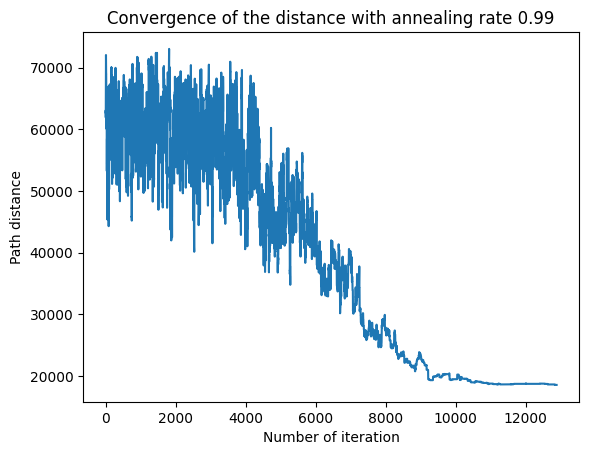

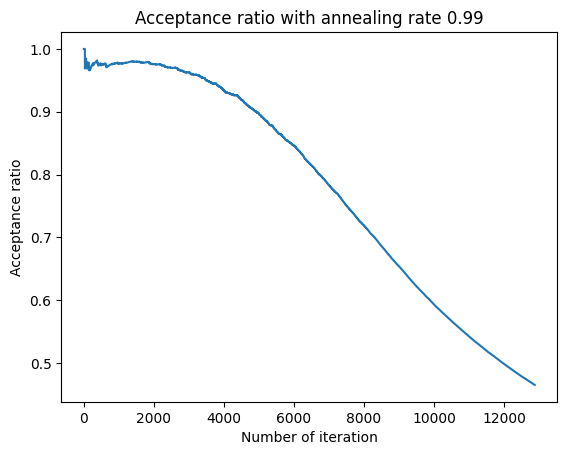

In [18]:
# plot path distance and number of iterations for annealing rate = 0.99
plt.plot(pathes_rate_099)
plt.xlabel('Number of iteration')
plt.ylabel('Path distance')
plt.title('Convergence of the distance with annealing rate 0.99')
plt.show()
# plot acceptance ratio for annealing rate = 0.99
plt.plot(acceptance_099)
plt.xlabel('Number of iteration')
plt.ylabel('Acceptance ratio')
plt.title('Acceptance ratio with annealing rate 0.99')
plt.show()

By the provided analysis we can see that higher annealing rate allows to find more optimized path to traverse our big country. Regarding acceptance ratio, it always decreases with higher number of iterations. It's reasonable, because we have decrease the path distance during the iterations and not every permutation will be decreasing it more. Additionaly, by setting initial_T to less values, we may obtain more optimized results, because log probability will be changing.